In [71]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Reading
df01 = pd.read_csv("MasterFile_6-1-23.csv", index_col=0)
dfML = pd.read_csv("MasterFile_6-1-23.csv" )




# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 
import seaborn as sns 
sns.set_style('darkgrid')
from matplotlib import style
%matplotlib inline


from statistics import mean

%pip install scikit-learn  --upgrade --force
%pip install xgboost
%pip install lightgbm



# ML 
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold)

import lightgbm as lgb



  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dolly\\AppData\\Local\\r-miniconda\\envs\\datascience-pro-env\\Lib\\site-packages\\~~5earn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

In [72]:
dfML['DB_Values'].describe

<bound method NDFrame.describe of 0        7.4
1        8.9
2        8.2
3        6.1
4        7.3
        ... 
27999    9.0
28000    7.4
28001    8.9
28002    9.1
28003    8.3
Name: DB_Values, Length: 28004, dtype: float64>

In [73]:
dfML.isnull().sum()

Year_Obv        0
States          0
DB_Values       0
DB_Low          0
DB_High         0
OB_Values       0
OB_Low          0
OB_High         0
HD_Values       0
HD_Low          0
HD_High         0
HC_Values       0
HC_Low          0
HC_High         0
HBP_Values      0
HBP_Low         0
HBP_High        0
TargetStroke    0
dtype: int64

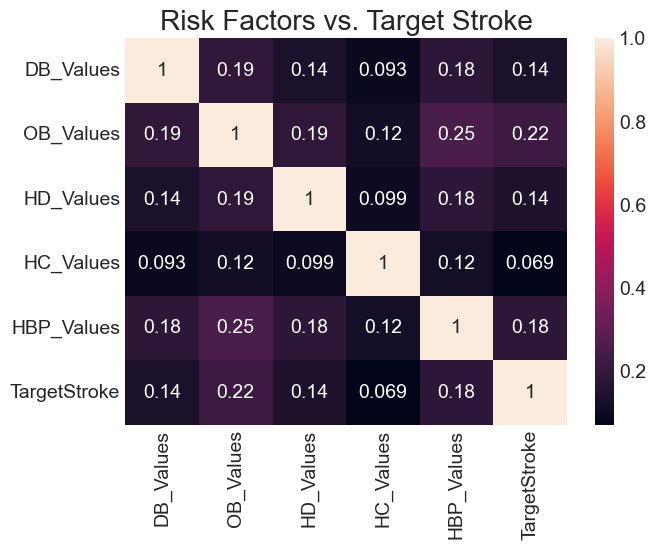

In [74]:
#Heatmap - illustrate from the low to high scales. 
# Looking for the highest (positive) or (negative) corr. features to the target.
# Which data are more predicted than the others. Which features have strong corr. or not to the target.

plt.title('Risk Factors vs. Target Stroke')
plt.tight_layout()
df_corr = dfML[['DB_Values',  'OB_Values', 'HD_Values',  'HC_Values','HBP_Values', 'TargetStroke']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

In [75]:
# check the corr against the Target_value.
dfML.corr()['TargetStroke']

C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\955206674.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfML.corr()['TargetStroke']


DB_Values       0.137260
DB_Low          0.135513
DB_High         0.138664
OB_Values       0.215474
OB_Low          0.212521
OB_High         0.218455
HD_Values       0.140528
HD_Low          0.142278
HD_High         0.137892
HC_Values       0.069340
HC_Low          0.066839
HC_High         0.071824
HBP_Values      0.180633
HBP_Low         0.179951
HBP_High        0.181334
TargetStroke    1.000000
Name: TargetStroke, dtype: float64

### Diabetes vs. Diabetes Distribution.

C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\1532859241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['DB_Values'])


Text(0.5, 0, 'DB- Data too peak in the middle - right skew.')

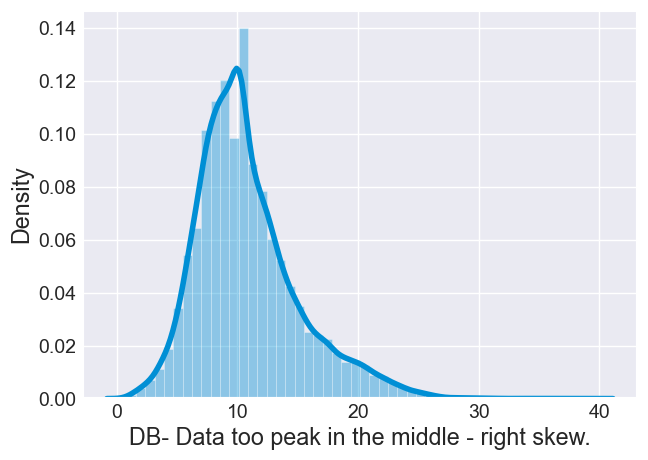

In [76]:
sns.distplot(dfML['DB_Values'])
plt.xlabel('DB- Data too peak in the middle - right skew.')


In [77]:
# Orginal values
print(dfML['DB_Values'].describe())
print('Skewness',  dfML['DB_Values'].skew())

count    28004.000000
mean        10.792319
std          4.209908
min          0.800000
25%          7.900000
50%         10.150000
75%         12.800000
max         39.500000
Name: DB_Values, dtype: float64
Skewness 0.9599750507222738


(array([1.950e+02, 7.290e+02, 2.681e+03, 5.263e+03, 6.675e+03, 4.722e+03,
        2.931e+03, 1.743e+03, 1.201e+03, 7.890e+02, 5.620e+02, 3.160e+02,
        1.320e+02, 3.900e+01, 1.300e+01, 8.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0.8  ,  2.735,  4.67 ,  6.605,  8.54 , 10.475, 12.41 , 14.345,
        16.28 , 18.215, 20.15 , 22.085, 24.02 , 25.955, 27.89 , 29.825,
        31.76 , 33.695, 35.63 , 37.565, 39.5  ]),
 <BarContainer object of 20 artists>)

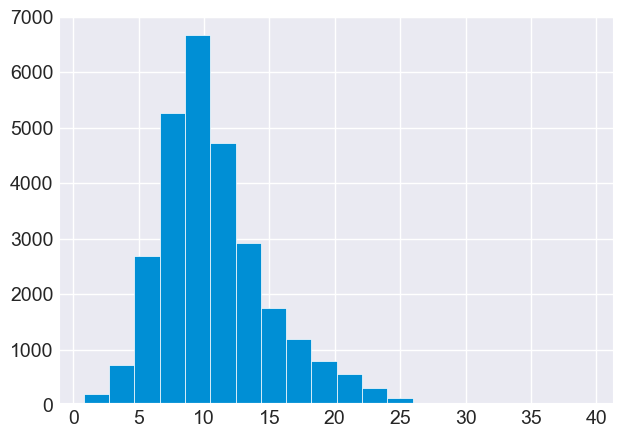

In [78]:
plt.hist(dfML['DB_Values'], bins = 20)

Apply Logging

In [79]:
dfML['Log_DB_Values'] = np.log((dfML.DB_Values)+ 10.0)

In [80]:
print(dfML.Log_DB_Values.describe())
print(('Skewness',  dfML['Log_DB_Values'].skew()))

count    28004.000000
mean         3.015351
std          0.194022
min          2.379546
25%          2.884801
50%          3.003204
75%          3.126761
max          3.901973
Name: Log_DB_Values, dtype: float64
('Skewness', 0.3264372477847284)


(array([4.600e+01, 1.150e+02, 2.310e+02, 5.320e+02, 1.253e+03, 2.315e+03,
        4.063e+03, 4.493e+03, 5.056e+03, 3.470e+03, 2.251e+03, 1.570e+03,
        1.103e+03, 8.240e+02, 4.640e+02, 1.740e+02, 2.900e+01, 1.000e+01,
        3.000e+00, 2.000e+00]),
 array([2.37954613, 2.45566746, 2.53178879, 2.60791011, 2.68403144,
        2.76015277, 2.83627409, 2.91239542, 2.98851675, 3.06463808,
        3.1407594 , 3.21688073, 3.29300206, 3.36912338, 3.44524471,
        3.52136604, 3.59748736, 3.67360869, 3.74973002, 3.82585134,
        3.90197267]),
 <BarContainer object of 20 artists>)

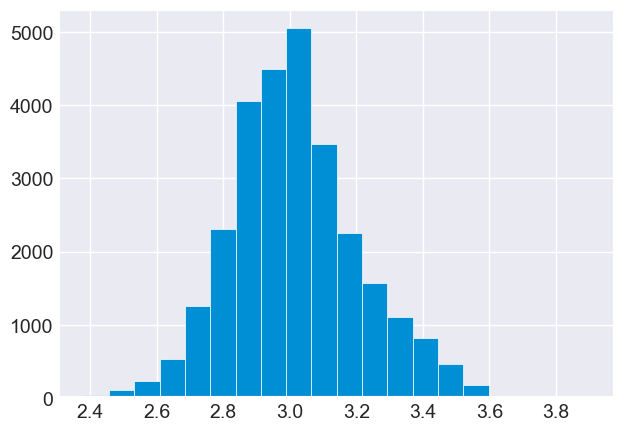

In [81]:
plt.hist(dfML['Log_DB_Values'], bins = 20)

In [82]:
print(dfML['Log_DB_Values'].describe())
print('Skewness',  dfML['Log_DB_Values'].skew())

count    28004.000000
mean         3.015351
std          0.194022
min          2.379546
25%          2.884801
50%          3.003204
75%          3.126761
max          3.901973
Name: Log_DB_Values, dtype: float64
Skewness 0.3264372477847284


C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\3871484649.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['OB_Values'])


Text(0.5, 0, 'OB- Data with fat tails - right skew.')

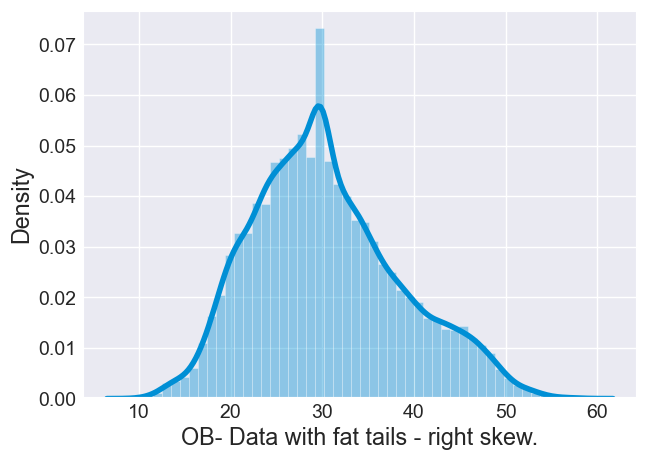

In [83]:
sns.distplot(dfML['OB_Values'])
plt.xlabel('OB- Data with fat tails - right skew.')

In [84]:
# original values
print(dfML['OB_Values'].describe())
print('Skewness',  dfML['OB_Values'].skew())

count    28004.000000
mean        30.452992
std          8.064717
min          9.600000
25%         24.600000
50%         29.770000
75%         35.400000
max         58.600000
Name: OB_Values, dtype: float64
Skewness 0.44823569303498184


(array([  29.,  200.,  428., 1171., 2113., 2577., 3247., 3448., 3878.,
        2653., 2193., 1624., 1285., 1089.,  887.,  698.,  315.,  121.,
          39.,    9.]),
 array([ 9.6 , 12.05, 14.5 , 16.95, 19.4 , 21.85, 24.3 , 26.75, 29.2 ,
        31.65, 34.1 , 36.55, 39.  , 41.45, 43.9 , 46.35, 48.8 , 51.25,
        53.7 , 56.15, 58.6 ]),
 <BarContainer object of 20 artists>)

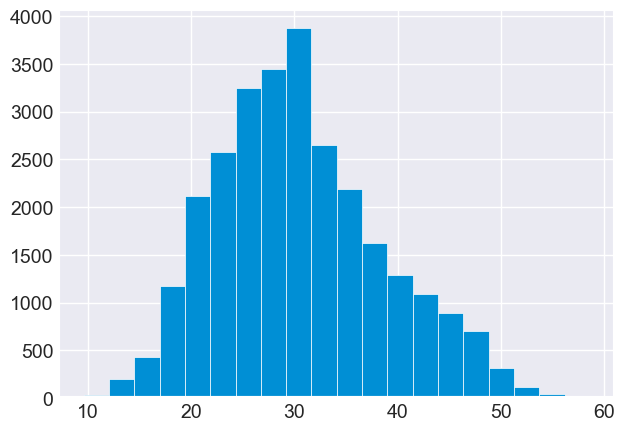

In [85]:
plt.hist(dfML['OB_Values'], bins = 20)

In [86]:
dfML['Log_OB_Values'] = np.log((dfML.OB_Values))

(array([3.000e+00, 1.600e+01, 3.100e+01, 1.010e+02, 1.420e+02, 2.440e+02,
        5.140e+02, 1.077e+03, 1.655e+03, 2.143e+03, 2.772e+03, 3.464e+03,
        4.349e+03, 3.233e+03, 2.675e+03, 2.174e+03, 1.605e+03, 1.343e+03,
        4.110e+02, 5.200e+01]),
 array([2.2617631 , 2.35221168, 2.44266026, 2.53310884, 2.62355742,
        2.714006  , 2.80445458, 2.89490316, 2.98535174, 3.07580032,
        3.1662489 , 3.25669748, 3.34714606, 3.43759464, 3.52804322,
        3.6184918 , 3.70894038, 3.79938896, 3.88983754, 3.98028612,
        4.0707347 ]),
 <BarContainer object of 20 artists>)

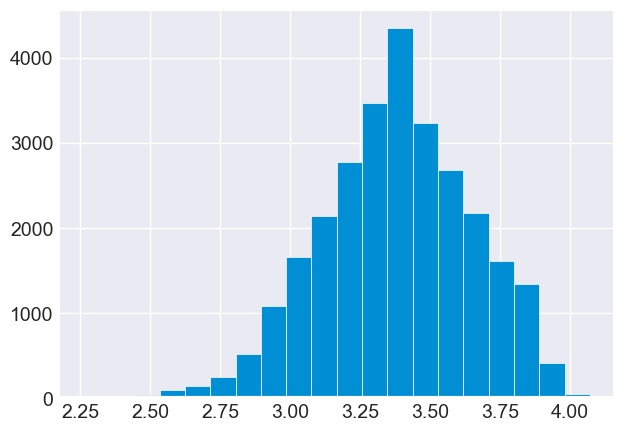

In [87]:
plt.hist(dfML['Log_OB_Values'], bins = 20)

In [88]:
print(dfML['Log_OB_Values'].describe())
print('Skewness',  dfML['Log_OB_Values'].skew())

count    28004.000000
mean         3.380644
std          0.269470
min          2.261763
25%          3.202746
50%          3.393501
75%          3.566712
max          4.070735
Name: Log_OB_Values, dtype: float64
Skewness -0.22658333351380433


(array([5.4900e+02, 1.2854e+04, 6.3230e+03, 4.1900e+03, 1.7400e+03,
        1.0440e+03, 6.7900e+02, 3.9000e+02, 1.6100e+02, 4.5000e+01,
        1.6000e+01, 6.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.3 ,  1.26,  2.22,  3.18,  4.14,  5.1 ,  6.06,  7.02,  7.98,
         8.94,  9.9 , 10.86, 11.82, 12.78, 13.74, 14.7 , 15.66, 16.62,
        17.58, 18.54, 19.5 ]),
 <BarContainer object of 20 artists>)

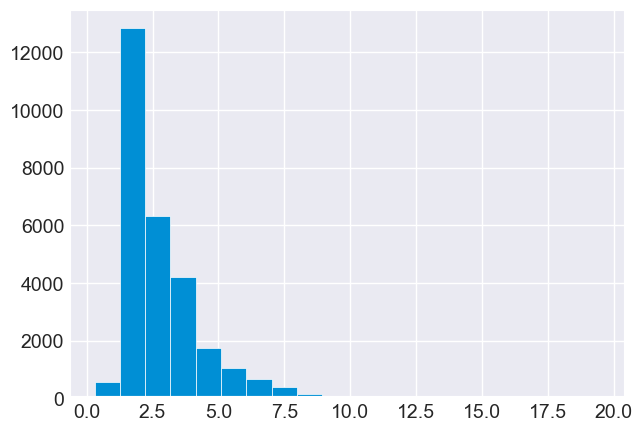

In [89]:
plt.hist(dfML['TargetStroke'], bins = 20)

Log applied to Target + 20.0

In [90]:
# testing - orginal values
dfML['TargetStroke'].describe()

count    28004.000000
mean         2.957606
std          1.357456
min          0.300000
25%          2.200000
50%          2.400000
75%          3.400000
max         19.500000
Name: TargetStroke, dtype: float64

In [91]:
dfML['Log_Target_Values'] = np.log((dfML.TargetStroke)+20.00)
dfML['Log_Target_Values'].describe()

count    28004.000000
mean         3.132016
std          0.056236
min          3.010621
25%          3.100092
50%          3.109061
75%          3.152736
max          3.676301
Name: Log_Target_Values, dtype: float64

(array([2.2300e+02, 1.2340e+03, 1.3145e+04, 5.1240e+03, 3.6470e+03,
        1.8250e+03, 1.1270e+03, 6.8400e+02, 5.3400e+02, 3.1700e+02,
        9.1000e+01, 3.4000e+01, 8.0000e+00, 5.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([3.01062089, 3.04390488, 3.07718886, 3.11047285, 3.14375684,
        3.17704083, 3.21032482, 3.24360881, 3.2768928 , 3.31017679,
        3.34346078, 3.37674477, 3.41002876, 3.44331275, 3.47659674,
        3.50988073, 3.54316471, 3.5764487 , 3.60973269, 3.64301668,
        3.67630067]),
 <BarContainer object of 20 artists>)

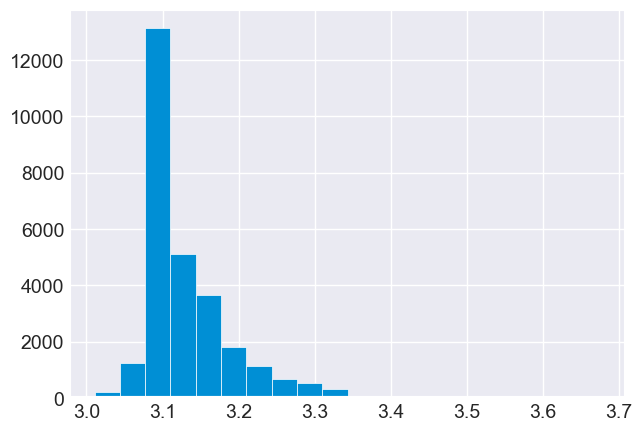

In [92]:
plt.hist(dfML['Log_Target_Values'], bins = 20)

In [93]:
print(dfML['Log_Target_Values'].describe())
print('Skewness',  dfML['Log_Target_Values'].skew())

count    28004.000000
mean         3.132016
std          0.056236
min          3.010621
25%          3.100092
50%          3.109061
75%          3.152736
max          3.676301
Name: Log_Target_Values, dtype: float64
Skewness 1.7168875601439597


In [94]:
dfML.corr()['Log_Target_Values']

C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\1905148790.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfML.corr()['Log_Target_Values']


DB_Values            0.137998
DB_Low               0.136249
DB_High              0.139398
OB_Values            0.216393
OB_Low               0.213449
OB_High              0.219364
HD_Values            0.141023
HD_Low               0.142734
HD_High              0.138407
HC_Values            0.070622
HC_Low               0.068127
HC_High              0.073102
HBP_Values           0.181385
HBP_Low              0.180703
HBP_High             0.182086
TargetStroke         0.998867
Log_DB_Values        0.132158
Log_OB_Values        0.208446
Log_Target_Values    1.000000
Name: Log_Target_Values, dtype: float64

C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\3178019727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['DB_Values'])
C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\3178019727.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['OB_Values'])


Text(0, 0.5, 'Median Measure(Density)')

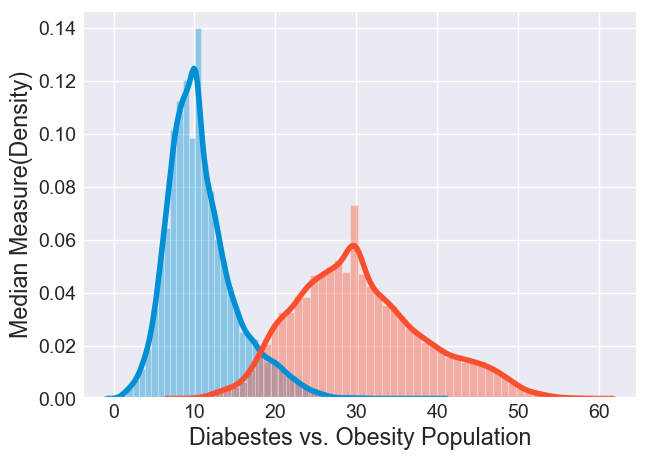

In [95]:
sns.distplot(dfML['DB_Values'])
sns.distplot(dfML['OB_Values'])

plt.xlabel('Diabestes vs. Obesity Population')
plt.ylabel('Median Measure(Density)')

C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\3053079896.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['HC_Values'])


Text(0.5, 0, 'HC- skinny tails and high peak in the middle.')

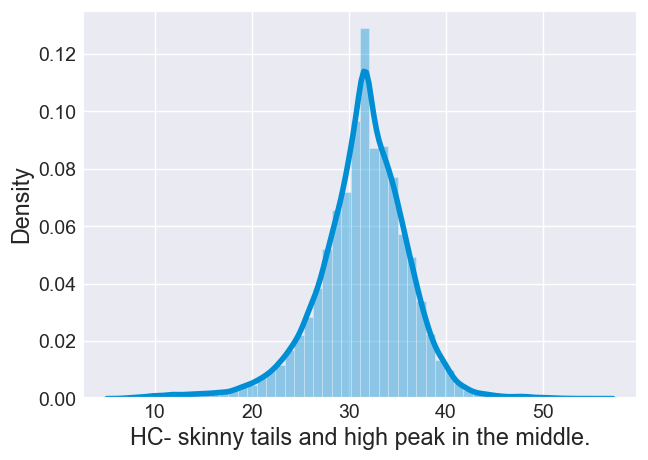

In [96]:
sns.distplot(dfML['HC_Values'])
plt.xlabel('HC- skinny tails and high peak in the middle.')

In [97]:
print(dfML['HC_Values'].describe())
print('Skewness',  dfML['HC_Values'].skew())

count    28004.000000
mean        31.372964
std          4.817532
min          6.900000
25%         28.900000
50%         31.670000
75%         34.300000
max         55.400000
Name: HC_Values, dtype: float64
Skewness -0.6871384778869564


(array([2.800e+01, 7.400e+01, 1.020e+02, 1.220e+02, 1.860e+02, 3.930e+02,
        7.840e+02, 1.637e+03, 3.308e+03, 5.514e+03, 7.069e+03, 4.849e+03,
        2.607e+03, 9.020e+02, 2.460e+02, 9.500e+01, 4.900e+01, 3.100e+01,
        7.000e+00, 1.000e+00]),
 array([ 6.9  ,  9.325, 11.75 , 14.175, 16.6  , 19.025, 21.45 , 23.875,
        26.3  , 28.725, 31.15 , 33.575, 36.   , 38.425, 40.85 , 43.275,
        45.7  , 48.125, 50.55 , 52.975, 55.4  ]),
 <BarContainer object of 20 artists>)

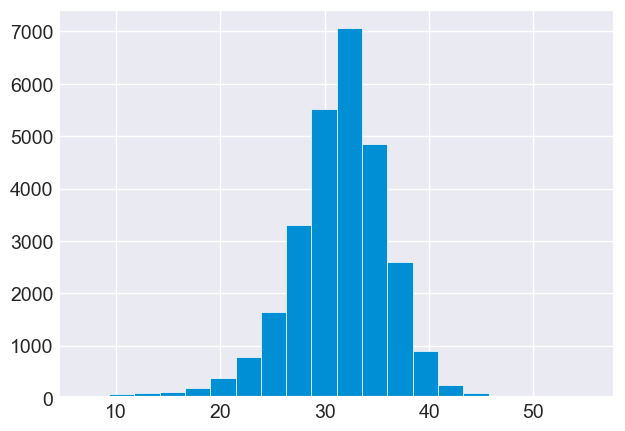

In [98]:
plt.hist(dfML['HC_Values'], bins = 20)

In [99]:
dfML['Log_HC_Values'] = np.log((dfML.HC_Values)+15)

(array([1.100e+01, 2.700e+01, 4.000e+01, 6.200e+01, 7.100e+01, 8.400e+01,
        1.150e+02, 2.180e+02, 4.240e+02, 8.480e+02, 1.809e+03, 3.666e+03,
        7.209e+03, 6.919e+03, 4.484e+03, 1.573e+03, 3.070e+02, 8.400e+01,
        5.000e+01, 3.000e+00]),
 array([3.08648664, 3.14487197, 3.2032573 , 3.26164263, 3.32002796,
        3.37841329, 3.43679862, 3.49518396, 3.55356929, 3.61195462,
        3.67033995, 3.72872528, 3.78711061, 3.84549594, 3.90388128,
        3.96226661, 4.02065194, 4.07903727, 4.1374226 , 4.19580793,
        4.25419326]),
 <BarContainer object of 20 artists>)

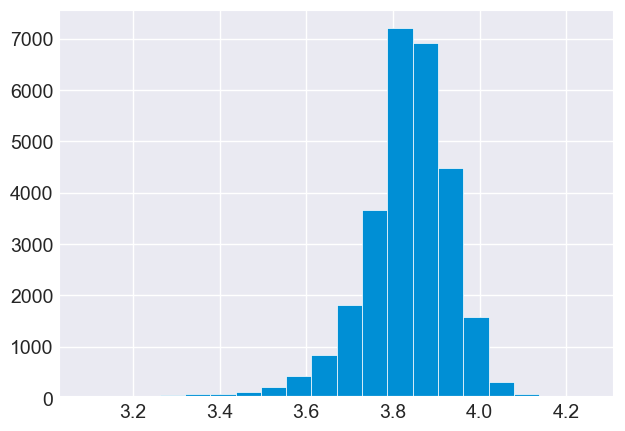

In [100]:
plt.hist(dfML['Log_HC_Values'], bins = 20)

In [101]:
print(dfML['Log_HC_Values'].describe())
print('Skewness',  dfML['Log_HC_Values'].skew())

count    28004.000000
mean         3.830859
std          0.110965
min          3.086487
25%          3.781914
50%          3.843102
75%          3.897924
max          4.254193
Name: Log_HC_Values, dtype: float64
Skewness -1.448919918573194


C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\2567818727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['HD_Values'])


Text(0.5, 0, 'HD- Data too peak in the middle - right skew.')

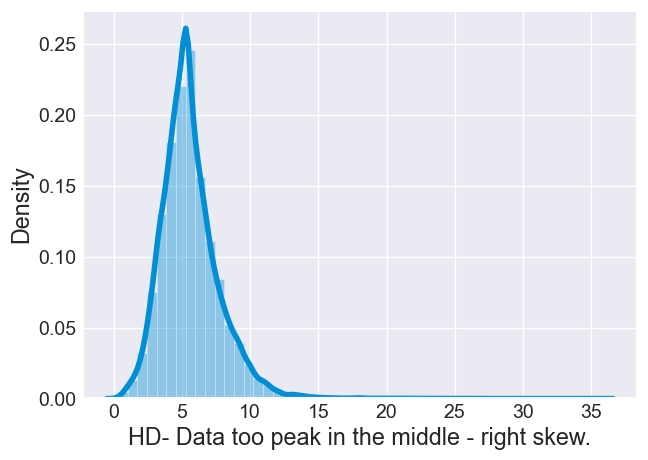

In [102]:
sns.distplot(dfML['HD_Values'])
plt.xlabel('HD- Data too peak in the middle - right skew.')

In [103]:
print(dfML['HD_Values'].describe())
print('Skewness',  dfML['HD_Values'].skew())

count    28004.000000
mean         5.594954
std          2.089131
min          0.300000
25%          4.300000
50%          5.320000
75%          6.600000
max         35.800000
Name: HD_Values, dtype: float64
Skewness 1.1055914029519256


In [104]:
dfML['Log_HD_Values'] = np.log((dfML.HD_Values) + 15.0)

(array([1.470e+02, 6.190e+02, 2.428e+03, 4.879e+03, 8.238e+03, 5.802e+03,
        3.011e+03, 1.768e+03, 7.090e+02, 2.410e+02, 1.060e+02, 2.700e+01,
        1.800e+01, 7.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([2.72785283, 2.787855  , 2.84785718, 2.90785936, 2.96786153,
        3.02786371, 3.08786589, 3.14786806, 3.20787024, 3.26787242,
        3.32787459, 3.38787677, 3.44787894, 3.50788112, 3.5678833 ,
        3.62788547, 3.68788765, 3.74788983, 3.807892  , 3.86789418,
        3.92789635]),
 <BarContainer object of 20 artists>)

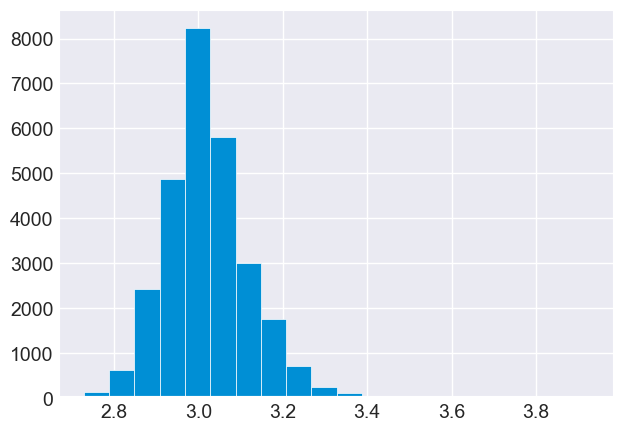

In [105]:
plt.hist(dfML['Log_HD_Values'], bins = 20)

In [106]:
print(dfML['Log_HD_Values'].describe())
print('Skewness',  dfML['Log_HD_Values'].skew())

count    28004.000000
mean         3.020147
std          0.098013
min          2.727853
25%          2.960105
50%          3.011606
75%          3.072693
max          3.927896
Name: Log_HD_Values, dtype: float64
Skewness 0.5776685526877008


C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\4133245892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['HBP_Values'])


Text(0.5, 0, 'HBP- Data too peak in the middle - right skew.')

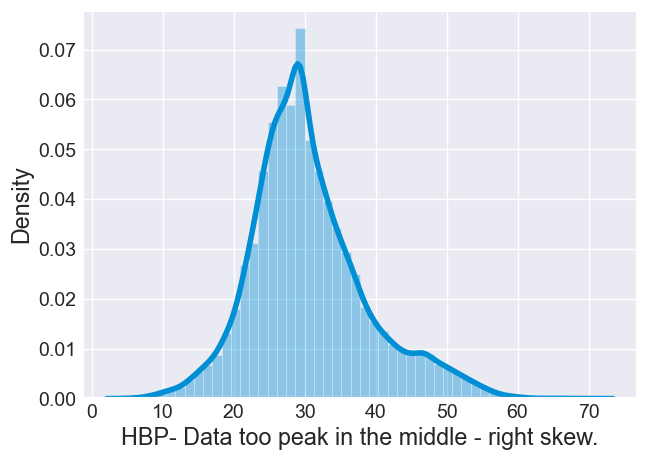

In [107]:
sns.distplot(dfML['HBP_Values'])
plt.xlabel('HBP- Data too peak in the middle - right skew.')

In [108]:
print(dfML['HBP_Values'].describe())
print('Skewness',  dfML['HBP_Values'].skew())

count    28004.000000
mean        30.614841
std          8.145618
min          5.300000
25%         25.400000
50%         29.300000
75%         34.700000
max         70.300000
Name: HBP_Values, dtype: float64
Skewness 0.6905538211329804


(array([2.300e+01, 1.190e+02, 3.010e+02, 6.820e+02, 1.544e+03, 3.357e+03,
        5.262e+03, 5.778e+03, 3.811e+03, 2.523e+03, 1.501e+03, 9.770e+02,
        8.570e+02, 6.170e+02, 4.180e+02, 1.700e+02, 5.100e+01, 6.000e+00,
        5.000e+00, 2.000e+00]),
 array([ 5.3 ,  8.55, 11.8 , 15.05, 18.3 , 21.55, 24.8 , 28.05, 31.3 ,
        34.55, 37.8 , 41.05, 44.3 , 47.55, 50.8 , 54.05, 57.3 , 60.55,
        63.8 , 67.05, 70.3 ]),
 <BarContainer object of 20 artists>)

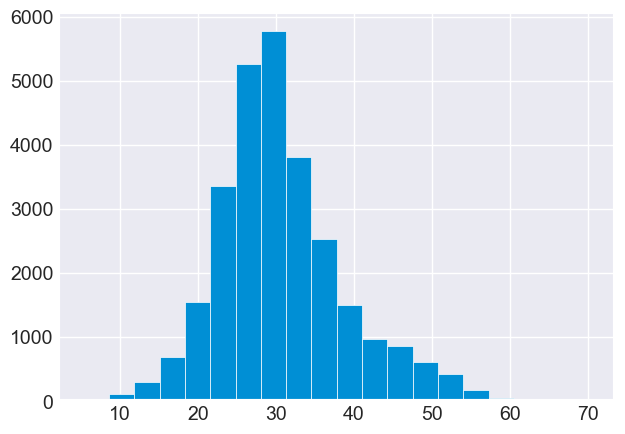

In [109]:
plt.hist(dfML['HBP_Values'], bins = 20)

In [110]:
dfML['Log_HBP_Values'] = np.log((dfML.HBP_Values))

In [111]:
print(dfML['Log_HBP_Values'].describe())
print('Skewness',  dfML['Log_HBP_Values'].skew())

count    28004.000000
mean         3.386058
std          0.269962
min          1.667707
25%          3.234749
50%          3.377588
75%          3.546740
max          4.252772
Name: Log_HBP_Values, dtype: float64
Skewness -0.3955052192676509


Replacimg values 

In [112]:
#dfML['HD_Values'].fillna(dfML['HD_Values'].mean(),inplace=True)

###  Diabetes vs. Diabetes Stat.

In [113]:
print('Mean value of Diabetes', dfML['Log_DB_Values'].mean())
print('Std value of Diabetes', dfML['Log_DB_Values'].std())
print('Min value of Diabetes', dfML['Log_DB_Values'].min())
print('Max value of Diabetes', dfML['Log_DB_Values'].max())
print('Skewness of Diabetes', dfML['Log_DB_Values'].skew())
print('-vs-')
print('Mean value of Obesity', dfML['Log_OB_Values'].mean())
print('Std value of Obesity', dfML['Log_OB_Values'].std())
print('Min value of Obesity', dfML['Log_OB_Values'].min())
print('Max value of Obesity', dfML['Log_OB_Values'].max())
print('Skewness of Obesity:', dfML['Log_OB_Values'].skew())

Mean value of Diabetes 3.015350747950556
Std value of Diabetes 0.1940219787051436
Min value of Diabetes 2.379546134130174
Max value of Diabetes 3.901972669574645
Skewness of Diabetes 0.3264372477847284
-vs-
Mean value of Obesity 3.3806435391328797
Std value of Obesity 0.26947037881913255
Min value of Obesity 2.2617630984737906
Max value of Obesity 4.070734696582967
Skewness of Obesity: -0.22658333351380433


C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\3280078971.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['Log_DB_Values'])
C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\3280078971.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['Log_OB_Values'])


Text(0, 0.5, 'Median Measure(Density)')

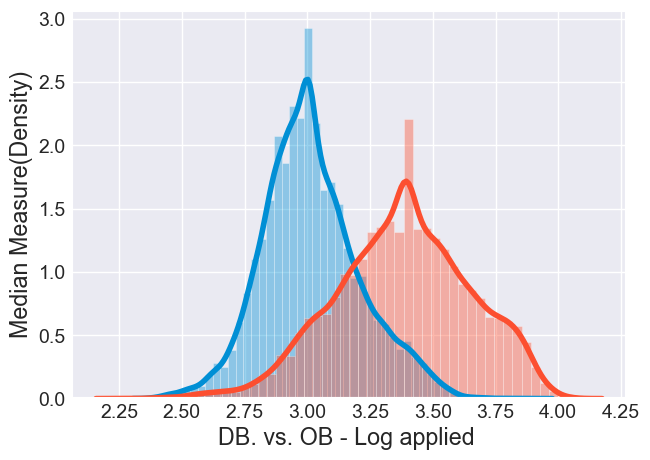

In [114]:
sns.distplot(dfML['Log_DB_Values'])
sns.distplot(dfML['Log_OB_Values'])


plt.xlabel('DB. vs. OB - Log applied ')
plt.ylabel('Median Measure(Density)')

### High Cholestrol vs. Heart Disese vs. High Blood Pressure.

C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\3397558934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['Log_HC_Values'])
C:\Users\dolly\AppData\Local\Temp\ipykernel_33764\3397558934.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfML['Log_HD_Values'])
C:\Users\dolly\AppData\L

Text(0, 0.5, 'Median Measure(Density)')

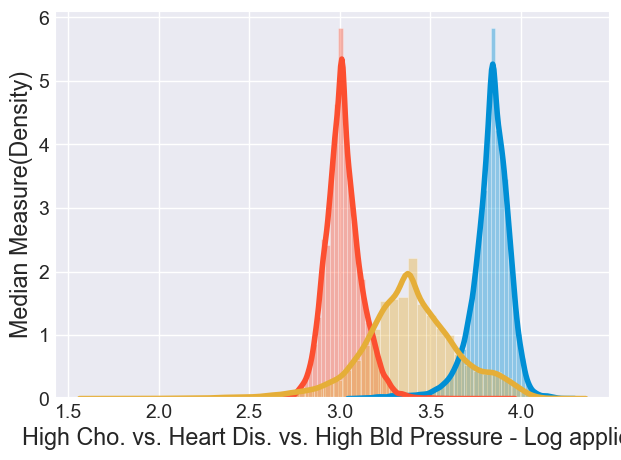

In [115]:
sns.distplot(dfML['Log_HC_Values'])
sns.distplot(dfML['Log_HD_Values'])
sns.distplot(dfML['Log_HBP_Values'])

plt.xlabel('High Cho. vs. Heart Dis. vs. High Bld Pressure - Log applied')
plt.ylabel('Median Measure(Density)')

# High Cholestrol vs. Heart Disese vs. High Blood Pressure Stat.

In [116]:
print('Mean value of High cholestrol', dfML['Log_HC_Values'].mean())
print('Std value of  High cholestrol', dfML['Log_HC_Values'].std())
print('Min value of  High cholestrol', dfML['Log_HC_Values'].min())
print('Max value of  High cholestrol', dfML['Log_HC_Values'].max())
print('Skewness of  High cholestrol',  dfML['Log_HC_Values'].skew())

print('-vs-')
print('Mean value of Heart Disease', dfML['Log_HD_Values'].mean())
print('Std value of Heart Disease', dfML['Log_HD_Values'].std())
print('Min value of Heart Disease', dfML['Log_HD_Values'].min())
print('Max value of Heart Diseasee', dfML['Log_HD_Values'].max())
print('Skewness of Heart Disease',  dfML['Log_HD_Values'].skew())

print('-vs-')
print('Mean value of High Blood Pressure', dfML['Log_HBP_Values'].mean())
print('Std value of High Blood Pressure', dfML['Log_HBP_Values'].std())
print('Min value of High Blood Pressure', dfML['Log_HBP_Values'].min())
print('Max value of High Blood Pressure', dfML['Log_HBP_Values'].max())
print('Skewness of High Blood Pressure',  dfML['Log_HBP_Values'].skew())

Mean value of High cholestrol 3.830859044562463
Std value of  High cholestrol 0.11096464217007965
Min value of  High cholestrol 3.086486636822455
Max value of  High cholestrol 4.254193263163997
Skewness of  High cholestrol -1.448919918573194
-vs-
Mean value of Heart Disease 3.020146633961366
Std value of Heart Disease 0.09801313160799012
Min value of Heart Disease 2.72785282839839
Max value of Heart Diseasee 3.927896354584436
Skewness of Heart Disease 0.5776685526877008
-vs-
Mean value of High Blood Pressure 3.386057895120757
Std value of High Blood Pressure 0.26996156205735844
Min value of High Blood Pressure 1.667706820558076
Max value of High Blood Pressure 4.252771798816619
Skewness of High Blood Pressure -0.3955052192676509


In [117]:
dfML.columns

Index(['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High',
       'TargetStroke', 'Log_DB_Values', 'Log_OB_Values', 'Log_Target_Values',
       'Log_HC_Values', 'Log_HD_Values', 'Log_HBP_Values'],
      dtype='object')

In [118]:
# dropping for the subplot - boxplots below
dfML_Log = dfML.drop(columns=['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High', 'TargetStroke', ])
#dfBP_01 = dfML_01.rename(columns={'DB_Values':'DB', 'DB_Low':'DBLo', 'DB_High':'DBHx', 'OB_Values':'OB', 'OB_Low':'OBLo', 'OB_High':'OBHx',  'HC_Values':'HC', 'HC_Low':'HCLo',  'HC_High':'HCHx',  'HD_Values':'HD',   'HD_Low':'HDLo',  'HD_High':'HDHx', 'HBP_Values':'HBP', 'HBP_Low':'HBPLo','HBP_High':'HBPHx','TargetStroke':'Target' })

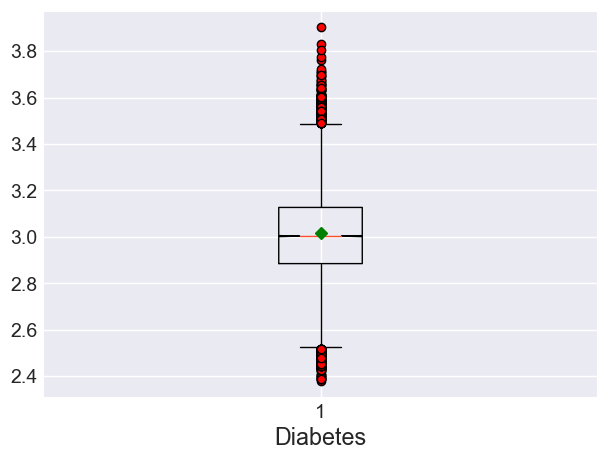

In [119]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=dfML_Log['Log_DB_Values'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);
plt.xlabel('Diabetes')
plt.show()

In [120]:
dfML_Log.columns

Index(['Log_DB_Values', 'Log_OB_Values', 'Log_Target_Values', 'Log_HC_Values',
       'Log_HD_Values', 'Log_HBP_Values'],
      dtype='object')

Log 1p transform

In [121]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

Building an isolation Forest Model to visualize outliers.

In [122]:

anomaly_inputs = ['Log_DB_Values',  'Log_OB_Values',  
       'Log_HD_Values',   'Log_HC_Values',  
       'Log_HBP_Values', 'Log_Target_Values']

from sklearn.ensemble import IsolationForest
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(dfML_Log[anomaly_inputs])



c:\Users\dolly\AppData\Local\R-MINI~1\envs\datascience-pro-env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

# visualize outliers

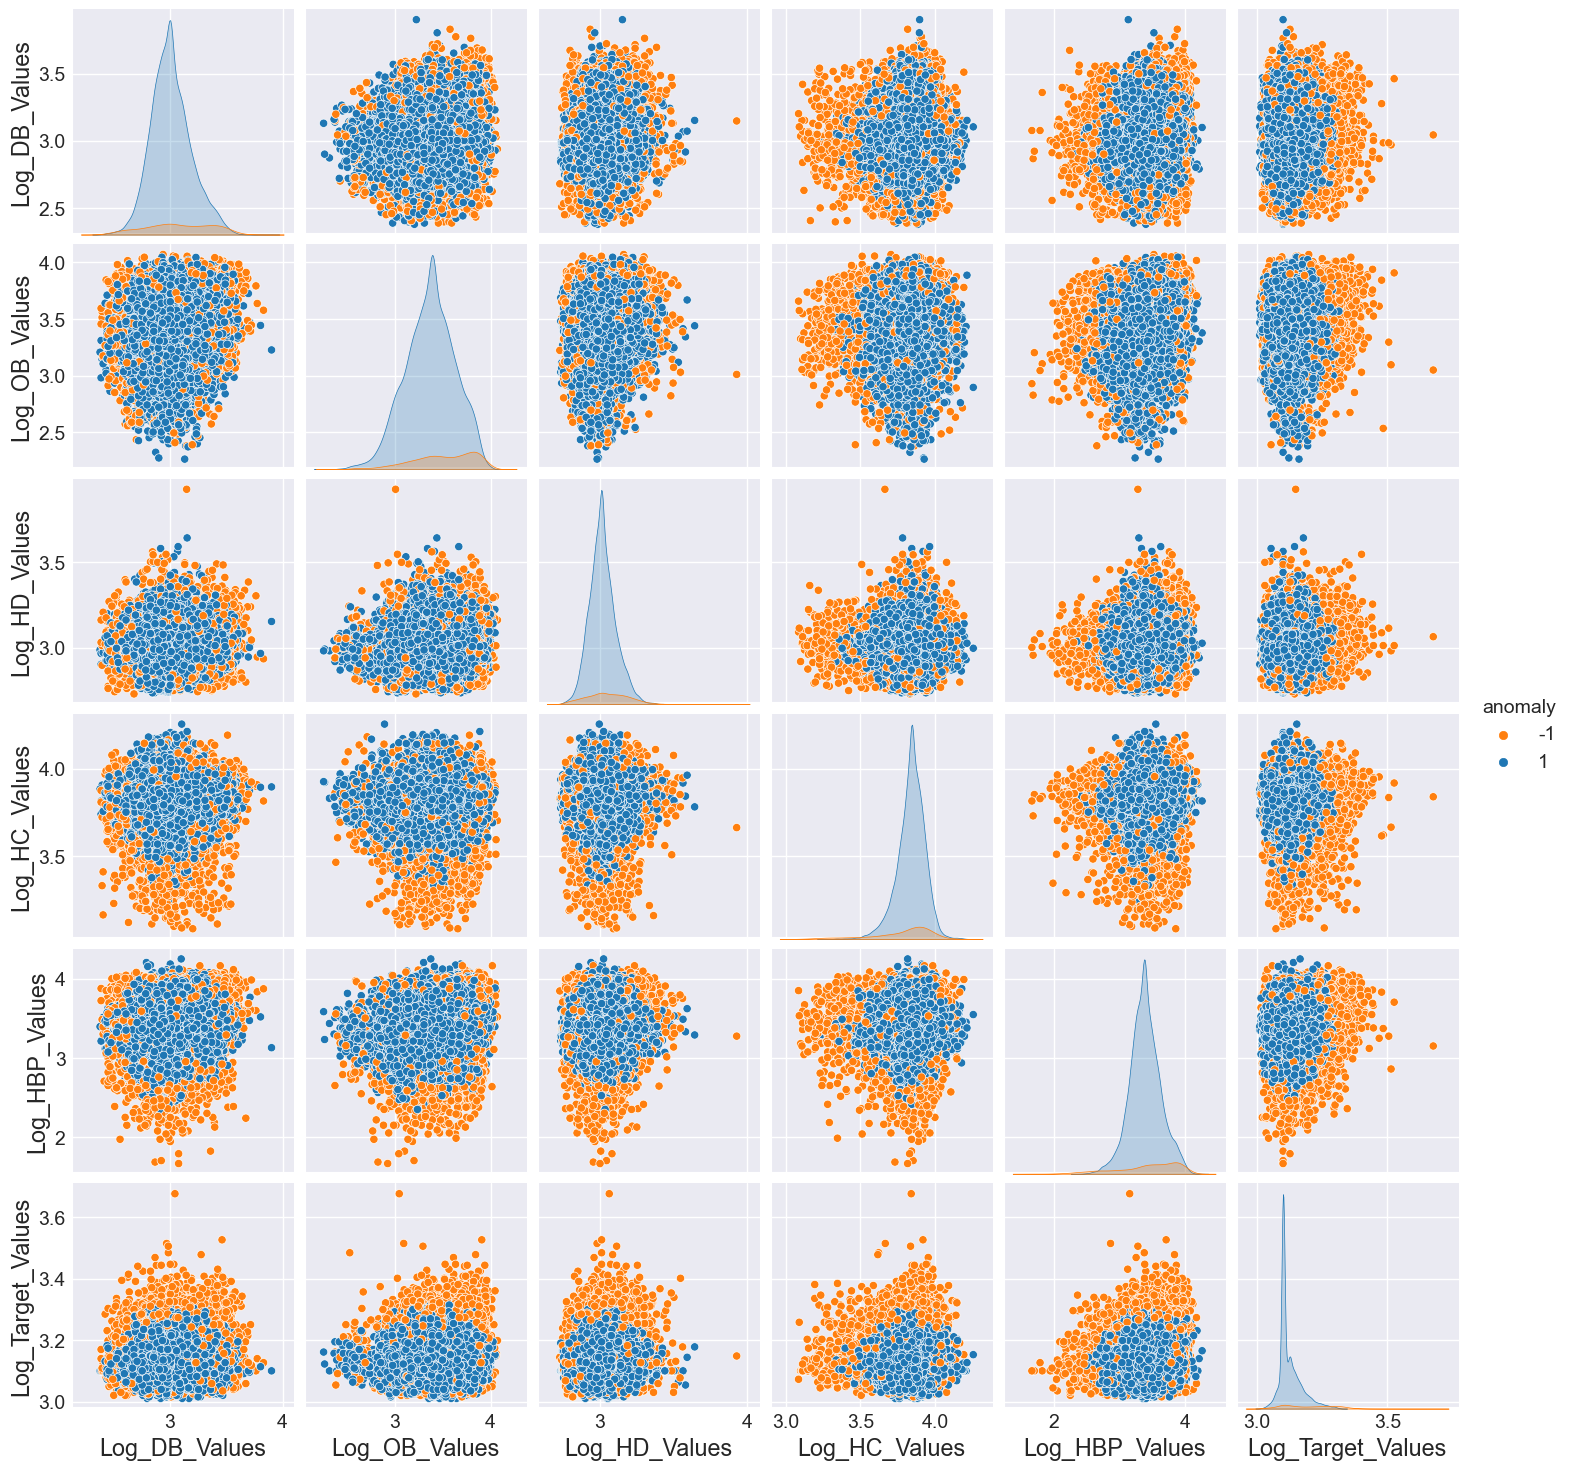

In [123]:
dfML_Log['anomaly_scores'] = model_IF.decision_function(dfML_Log[anomaly_inputs])
dfML_Log['anomaly'] = model_IF.predict(dfML_Log[anomaly_inputs])

palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(dfML_Log, vars=anomaly_inputs, hue='anomaly', palette=palette)

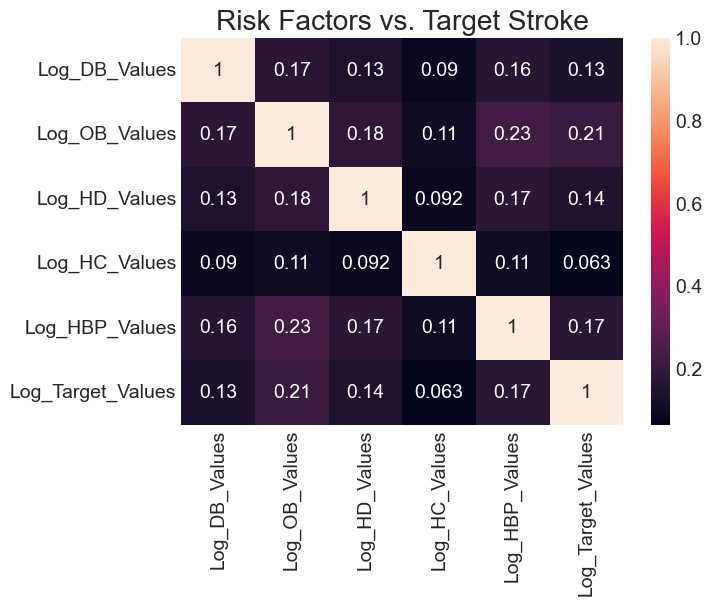

In [124]:

plt.title('Risk Factors vs. Target Stroke')
plt.tight_layout()
df_corr = dfML_Log[['Log_DB_Values',  'Log_OB_Values', 'Log_HD_Values',  'Log_HC_Values','Log_HBP_Values', 'Log_Target_Values']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

In [125]:
# check the corr against the Target_value.
dfML_Log.corr()['Log_Target_Values']

Log_DB_Values        0.132158
Log_OB_Values        0.208446
Log_Target_Values    1.000000
Log_HC_Values        0.063471
Log_HD_Values        0.140478
Log_HBP_Values       0.167057
anomaly_scores      -0.463387
anomaly             -0.394654
Name: Log_Target_Values, dtype: float64

In [126]:
dfML_Log.head(5)

,Log_DB_Values,Log_OB_Values,Log_Target_Values,Log_HC_Values,Log_HD_Values,Log_HBP_Values,anomaly_scores,anomaly
0,2.856470,3.591818,3.100092,3.856510,2.954910,3.475067,0.132613,1
1,2.939162,3.511545,3.100092,3.871201,2.980619,3.342862,0.143002,1
2,2.901422,3.663562,3.100092,3.848018,3.034953,3.520461,0.131332,1
3,2.778819,3.508556,3.100092,3.790985,2.965273,3.310543,0.127413,1
4,2.850707,3.502550,3.100092,3.837299,2.944439,3.496508,0.134486,1


In [127]:
dfML_Log = dfML.drop(columns=['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High', 'TargetStroke', ])

### Cal. each upper and lower quantiles.


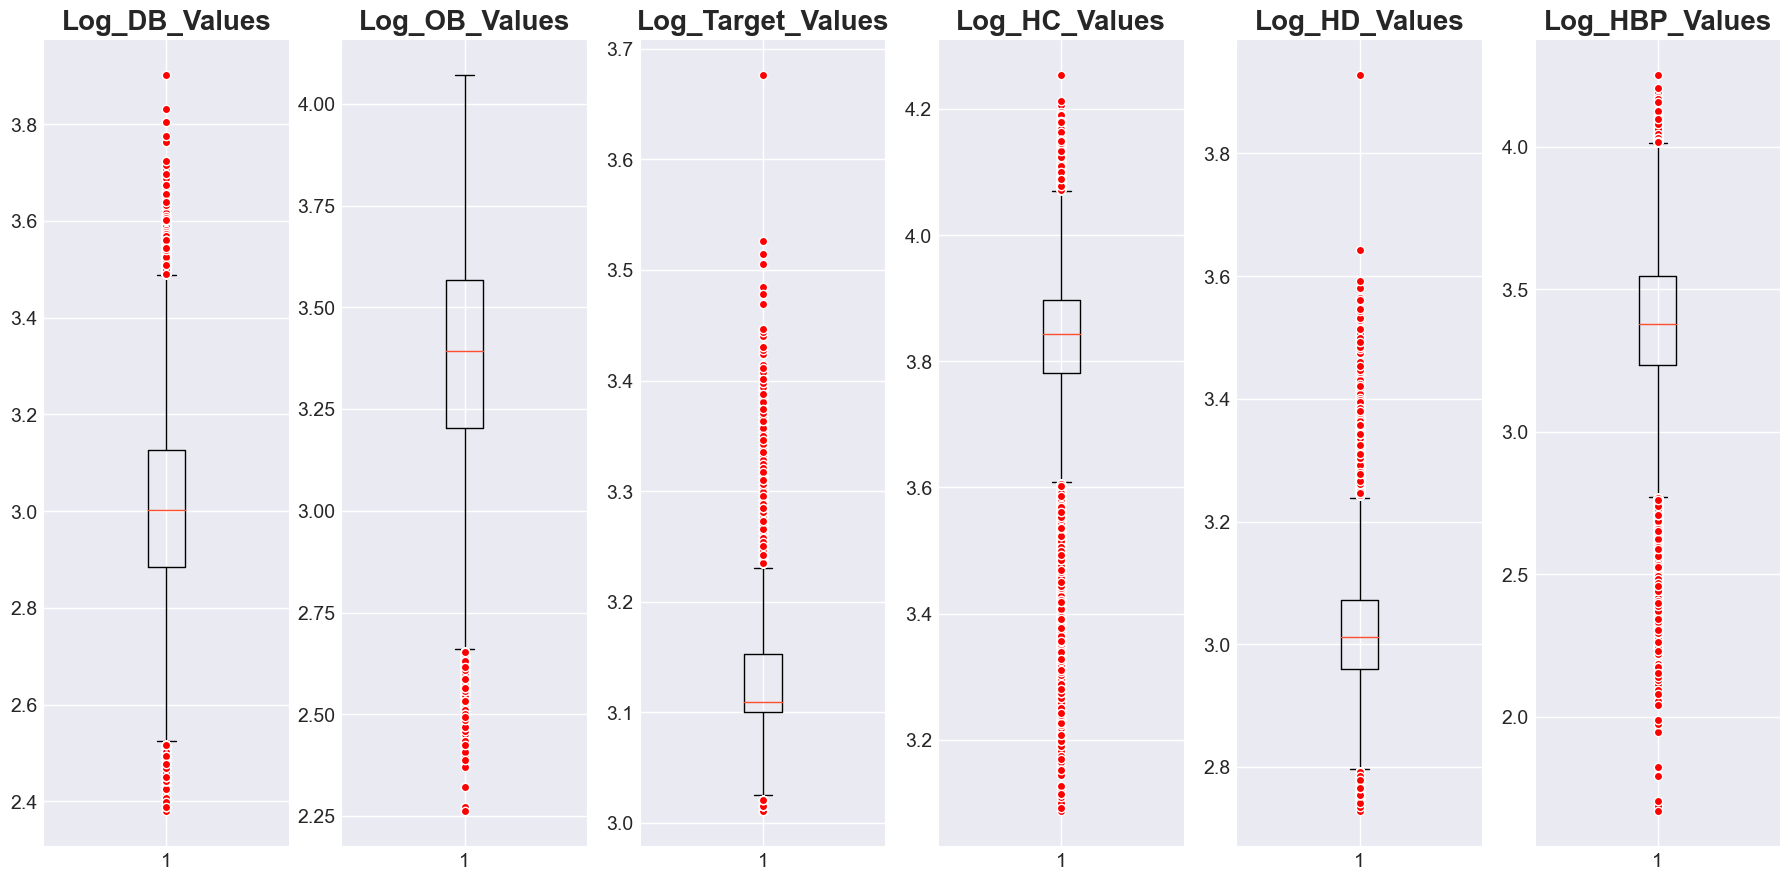

In [128]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(dfML_Log.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(dfML_Log.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(dfML_Log.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

In [129]:
dfML_Log.columns

Index(['Log_DB_Values', 'Log_OB_Values', 'Log_Target_Values', 'Log_HC_Values',
       'Log_HD_Values', 'Log_HBP_Values'],
      dtype='object')

In [130]:
dfML_Log['Log_OB_Values'].describe

<bound method NDFrame.describe of 0        3.591818
1        3.511545
2        3.663562
3        3.508556
4        3.502550
           ...   
27999    3.363842
28000    3.391147
28001    3.346389
28002    3.303217
28003    3.306887
Name: Log_OB_Values, Length: 28004, dtype: float64>

In [131]:
q01 = dfML_Log['Log_DB_Values'] .quantile(.99)
q02 = dfML_Log['Log_DB_Values'] .quantile(0.01)
#q03 = dfML['DB_Low'] .quantile(0.90)
#q04 =  dfML['DB_Low'] .quantile(0.01)
#q05 = dfML['DB_High'] .quantile(0.90)
#q06 = dfML['DB_High'] .quantile(0.01)

q07 =  dfML_Log['Log_OB_Values'] .quantile(0.95)
q08 =  dfML_Log['Log_OB_Values'] .quantile(0.01)
#q09 =  dfML['OB_Low'] .quantile(0.95)
#q10 =  dfML['OB_Low'] .quantile(0.01)
#q11 =  dfML['OB_High'] .quantile(0.95)
#q12 =  dfML1['OB_High'] .quantile(0.01)


q13 =  dfML_Log['Log_HC_Values'] .quantile(0.95)
q14 =  dfML_Log['Log_HC_Values'] .quantile(0.2)
#q15 =  dfML['HC_Low'] .quantile(0.95)
#q16 =  dfML['HC_Low'] .quantile(0.02)
##q17 =  dfML['HC_High'] .quantile(0.95)
#q18 =  dfML['HC_High'] .quantile(0.02)


q19 =  dfML_Log['Log_HD_Values'] .quantile(0.90)
q20 =  dfML_Log['Log_HD_Values'] .quantile(0.01)
#q21 = dfML['HD_Low'] .quantile(0.90)
#q22 =  dfML['HD_Low'] .quantile(0.01)
#q23 =  dfML['HD_High'] .quantile(0.90)
#q24 =  dfML['HD_High'] .quantile(0.01)

q25 =  dfML_Log['Log_HBP_Values'] .quantile(0.90)
q26 = dfML_Log['Log_HBP_Values'] .quantile(0.02)
#q27 =  dfML['HBP_Low'] .quantile(0.89)
#q28 =  dfML['HBP_Low'] .quantile(0.02)
#q29 =  dfML['HBP_High'] .quantile(0.89)
#q30 = dfML['HBP_High'] .quantile(0.02)


q31 = dfML_Log['Log_Target_Values'].quantile(0.77)
q32 = dfML_Log['Log_Target_Values'].quantile(0.04)

In [132]:
print(q31)
print(q32)

3.1570004211501135
3.068052935133617


In [133]:
dfML_Log.describe().T

,count,mean,std,min,25%,50%,75%,max
Log_DB_Values,28004.0,3.015351,0.194022,2.379546,2.884801,3.003204,3.126761,3.901973
Log_OB_Values,28004.0,3.380644,0.269470,2.261763,3.202746,3.393501,3.566712,4.070735
Log_Target_Values,28004.0,3.132016,0.056236,3.010621,3.100092,3.109061,3.152736,3.676301
Log_HC_Values,28004.0,3.830859,0.110965,3.086487,3.781914,3.843102,3.897924,4.254193
Log_HD_Values,28004.0,3.020147,0.098013,2.727853,2.960105,3.011606,3.072693,3.927896
Log_HBP_Values,28004.0,3.386058,0.269962,1.667707,3.234749,3.377588,3.546740,4.252772


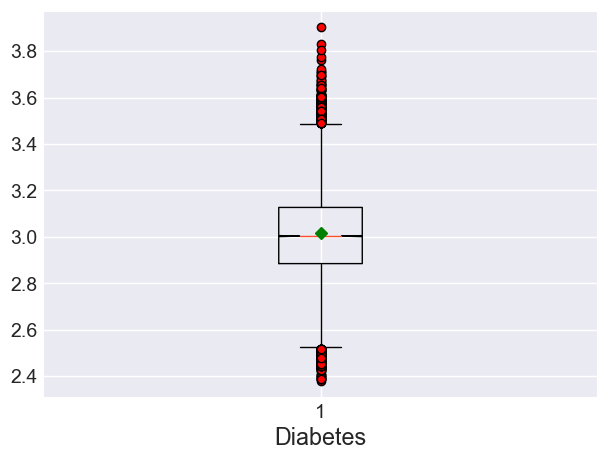

In [134]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=dfML_Log['Log_DB_Values'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);
plt.xlabel('Diabetes')
plt.show()

In [135]:
dfML_Log.describe().T

,count,mean,std,min,25%,50%,75%,max
Log_DB_Values,28004.0,3.015351,0.194022,2.379546,2.884801,3.003204,3.126761,3.901973
Log_OB_Values,28004.0,3.380644,0.269470,2.261763,3.202746,3.393501,3.566712,4.070735
Log_Target_Values,28004.0,3.132016,0.056236,3.010621,3.100092,3.109061,3.152736,3.676301
Log_HC_Values,28004.0,3.830859,0.110965,3.086487,3.781914,3.843102,3.897924,4.254193
Log_HD_Values,28004.0,3.020147,0.098013,2.727853,2.960105,3.011606,3.072693,3.927896
Log_HBP_Values,28004.0,3.386058,0.269962,1.667707,3.234749,3.377588,3.546740,4.252772


### Extacting and Trimming the outliers

In [136]:
# dfML_Log =(dfML_Log['Log_DB_Values'] >= 1.02) & (dfML_Log['Log_DB_Values'] <= 3.5)
#& (dfML_Log['Log_OB_Values'] >= q08) & (dfML_Log['Log_OB_Values'] <= q07) \
#& (dfML_Log['Log_HC_Values'] >= q14) & (dfML_Log['Log_HC_Values'] <= q13) \
#& (dfML_Log['Log_HD_Values'] >= q20) & (dfML_Log['Log_HD_Values'] <= q19) \
#& (dfML_Log['Log_HBP_Values'] >= q26) & (dfML_Log['Log_HBP_Values'] <= q25) \
#& (dfML_Log['TargetStroke'] >= q32) & (dfML_Log['TargetStroke'] <=q31) 


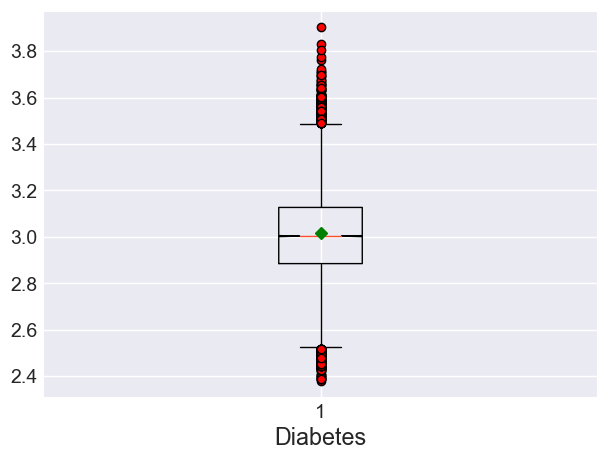

In [137]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=dfML_Log['Log_DB_Values'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);
plt.xlabel('Diabetes')
plt.show()

In [138]:
dfML_Log.columns

Index(['Log_DB_Values', 'Log_OB_Values', 'Log_Target_Values', 'Log_HC_Values',
       'Log_HD_Values', 'Log_HBP_Values'],
      dtype='object')

In [140]:
# dropping for pairplot visualization below only - not for other parameters.
#df = dfML_Log.drop(columns=['anomaly_scores','anomaly'])
#dfML = df_Dp.rename(columns={'DB_Values':'DB', 'DB_Low':'DBLo', 'DB_High':'DBHx', 'OB_Values':'OB', 'OB_Low':'OBLo', 'OB_High':'OBHx',  'HC_Values':'HC', 'HC_Low':'HCLo',  'HC_High':'HCHx',  'HD_Values':'HD',   'HD_Low':'HDLo',  'HD_High':'HDHx', 'HBP_Values':'HBP', 'HBP_Low':'HBPLo','HBP_High':'HBPHx','TargetStroke':'Target' })

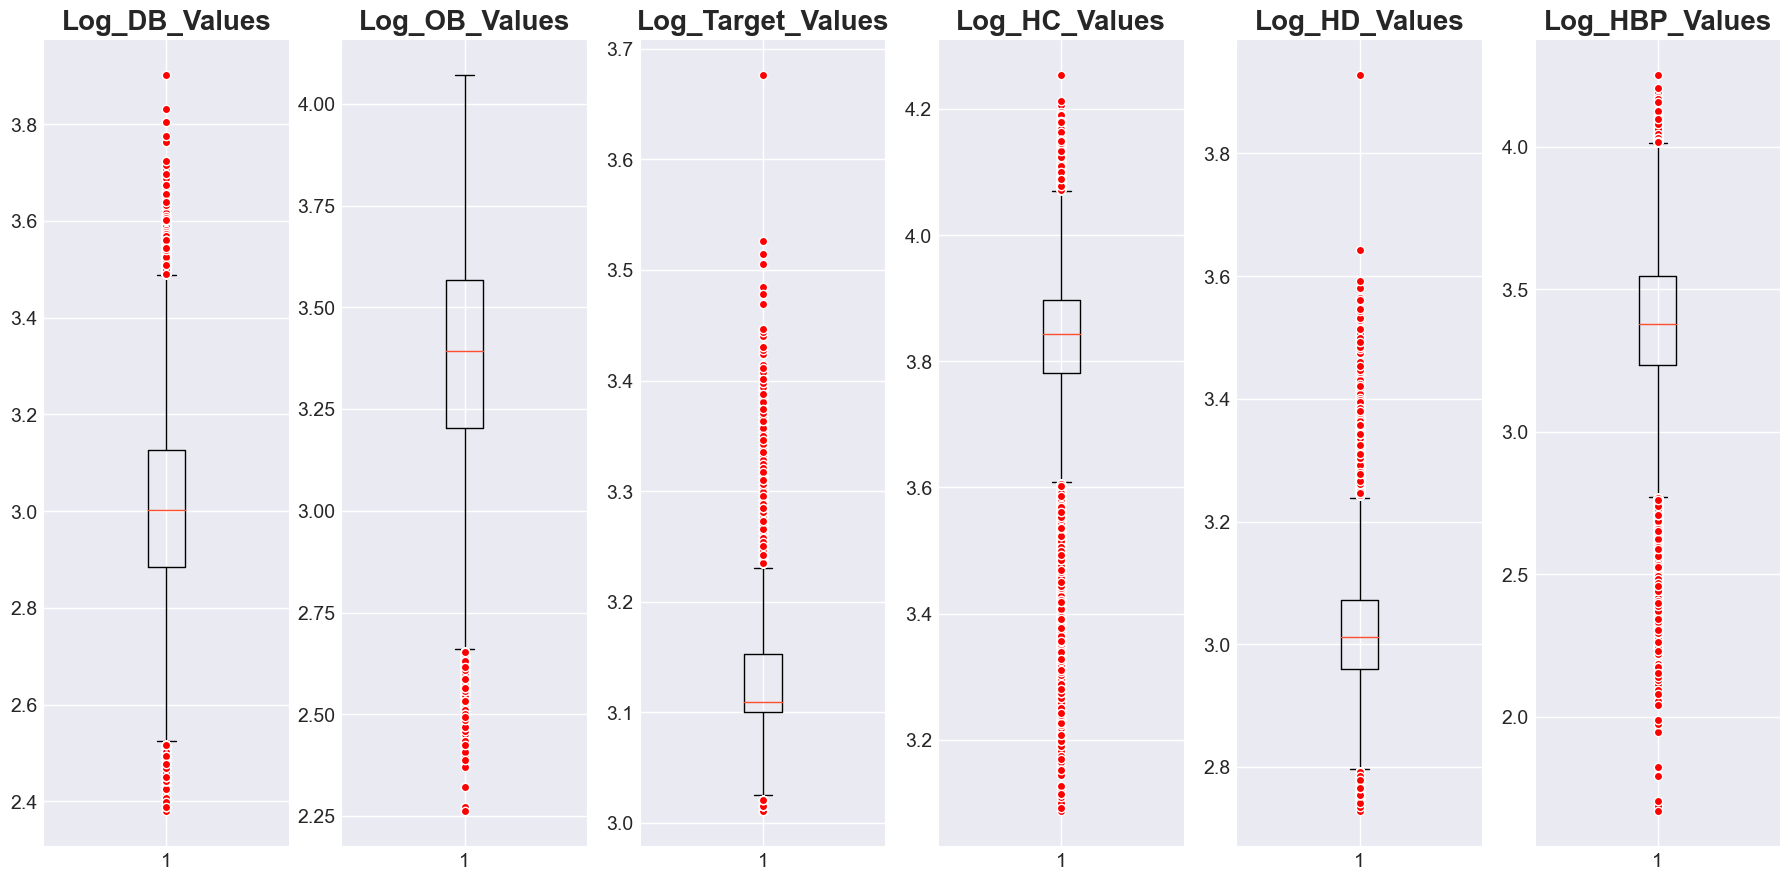

In [141]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(dfML_Log.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(dfML_Log.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(dfML_Log.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

### dfML dataframe without outliers. 

In [142]:
dfML_Log.columns

Index(['Log_DB_Values', 'Log_OB_Values', 'Log_Target_Values', 'Log_HC_Values',
       'Log_HD_Values', 'Log_HBP_Values'],
      dtype='object')

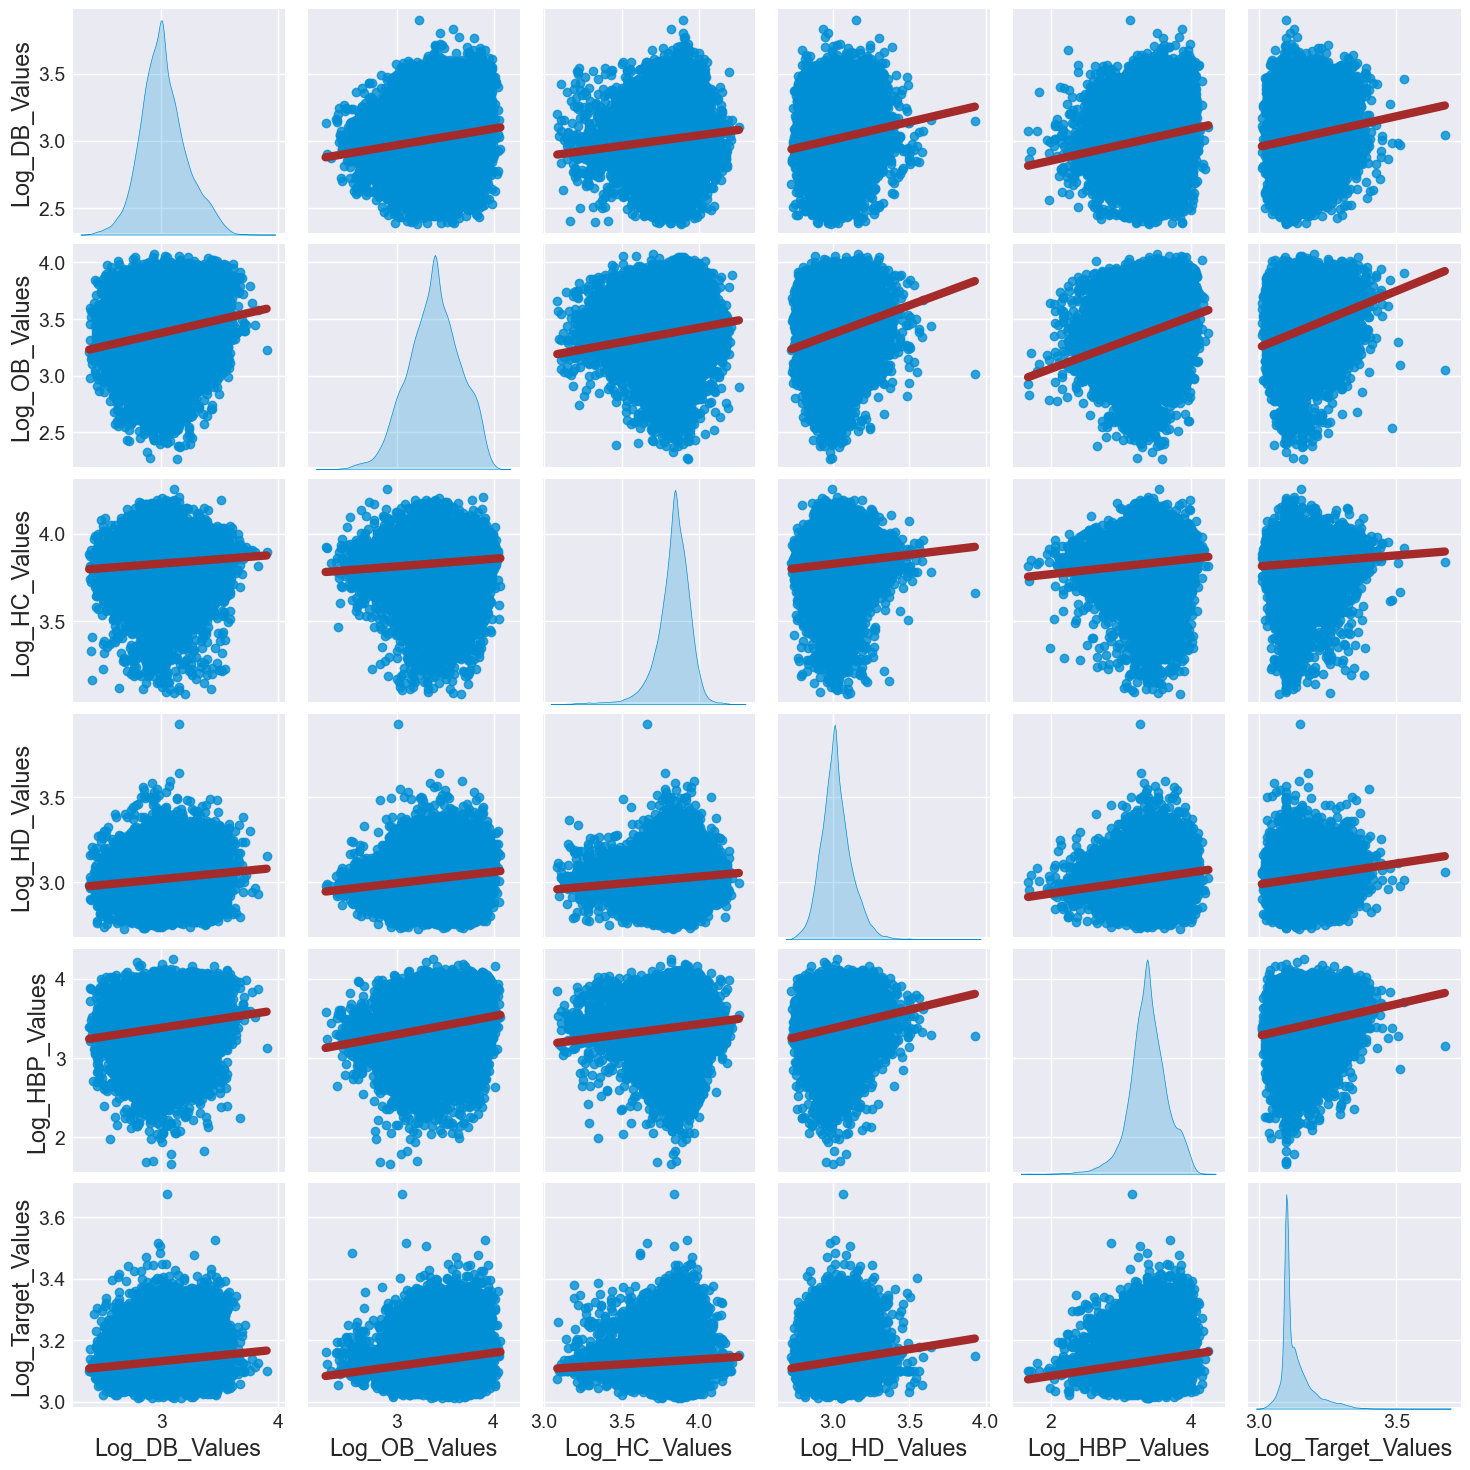

In [143]:
col_to_plot01 = ['Log_DB_Values', 'Log_OB_Values', 'Log_HC_Values','Log_HD_Values', 'Log_HBP_Values', 'Log_Target_Values',]
sns.pairplot(dfML_Log[col_to_plot01], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'brown'}})

In [ ]:
dfML_Log.corr()['Log_Target_Values']

df - ML model including "statenames"

In [144]:
dfML_Final = dfML_Log.drop(columns=['Log_Target_Values'])

In [145]:
dfML_Final

,Log_DB_Values,Log_OB_Values,Log_HC_Values,Log_HD_Values,Log_HBP_Values
0,2.856470,3.591818,3.856510,2.954910,3.475067
1,2.939162,3.511545,3.871201,2.980619,3.342862
2,2.901422,3.663562,3.848018,3.034953,3.520461
3,2.778819,3.508556,3.790985,2.965273,3.310543
4,2.850707,3.502550,3.837299,2.944439,3.496508
...,...,...,...,...,...
27999,2.944439,3.363842,3.793239,2.906901,3.034953
28000,2.856470,3.391147,3.824284,2.990720,3.481240
28001,2.939162,3.346389,3.869116,3.077312,3.443618
28002,2.949688,3.303217,3.841601,3.005683,3.462606


ML

In [ ]:
#df_dummies = pd.get_dummies(df02.States)

In [ ]:
# Only merging the stateName (Dummies)
#df_merged = pd.concat([df02, df_dummies],axis='columns')
#df_merged

In [ ]:
# Dropping - including the target -> 'TargetStroke'
#df_Final = df_merged.drop(['TargetStroke', 'States'],axis='columns' )


ML - Linear Regression

Test train split for supervised training.
Using the testing portion to predict how well the model perform

In [146]:
X= dfML_Final
y = dfML_Log['Log_Target_Values']  # dependent feature (Stroke).
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [147]:
y

0        3.100092
1        3.100092
2        3.100092
3        3.100092
4        3.100092
           ...   
27999    3.126761
28000    3.144152
28001    3.135494
28002    3.104587
28003    3.104587
Name: Log_Target_Values, Length: 28004, dtype: float64

In [148]:

# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)


LinearRegression()

In [152]:
#=========================================
score_train = modelReg.predict(X_train)
score_test = modelReg.predict(X_test)
#-========================================

y_pred = modelReg.predict(X_test) # predict X(all factors).
modelReg.score(X_test,y_test) # See the performance (diff of actual value(y_test) from predicted X_test)

0.07250448258974618

In [150]:
# Creating new df for the results. What is the probility of someone have the stroke based on the results.
pred_y_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_df[0:5]


,Actual Stroke Value,Predicted Value,absErrors,Sqr,Percentage_Err
24966,3.242592,3.145270,0.097322,0.009472,3.001370
16406,3.086487,3.121528,0.035041,0.001228,1.135315
14465,3.157000,3.136128,0.020873,0.000436,0.661150
15196,3.135494,3.144463,0.008968,0.000080,0.286028
9411,3.161247,3.143956,0.017291,0.000299,0.546970


In [ ]:
print(modelReg.score(X_test,y_test))
#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
#print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

#==============================================================
Tot_Err = pred_y_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

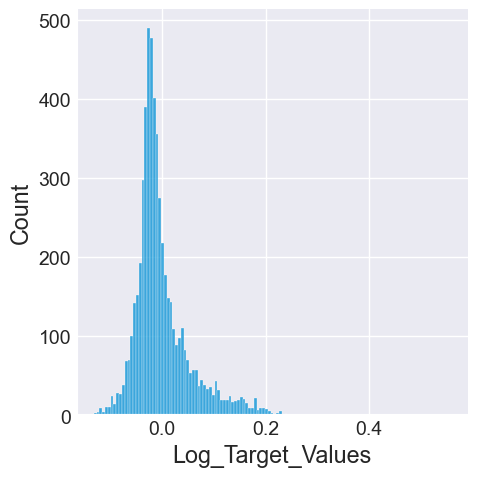

In [151]:
import seaborn as sns
sns.displot(y_test-y_pred)

XGBRegressor ML Model

In [ ]:
pip install xgboost


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
modelXGB= XGBRegressor()
modelXGB.fit(X_train,y_train)
modelXGB.predict(X_test)
#y_test  


y_pred = modelXGB.predict(X_test) # Predicting X(all factors).
modelXGB.score(X_test,y_test) # The performance.


print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



In [ ]:

#-=================
# Creating new df - holding values 

pred_y_XGB_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_XGB_df [0:5]

In [ ]:

#==============================================================
Tot_Err = pred_y_XGB_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_XGB_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_XGB_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_XGB_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

from sklearn.metrics import mean_squared_error

print('MSE = ', mean_squared_error(pred_y_XGB_df['Actual Stroke Value'], pred_y_XGB_df['Predicted Value'] ) )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
print("SSE = ", pred_y_XGB_df['Sqr'].sum())

ML Analyzing using - Decision Tree Model.

In [ ]:

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.predict(X_test)
#y_test  


y_pred = modelDT.predict(X_test) # Predicting X(all factors).
modelDT.score(X_test,y_test) # The performance.

In [ ]:
# Creating new df - holding values for Decision Tree

pred_y_DT_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_DT_df[0:5]

In [ ]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



#==============================================================
Tot_Err = pred_y_DT_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_DT_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_DT_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_DT_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

In [ ]:
model_ranks=pd.Series(modelDT.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

#### ML Analyzing using - RandomForestRegressor Model.

In [ ]:

modelRF = RandomForestRegressor(n_estimators=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


modelRF.fit(X_train,y_train)
y_pred = modelRF.predict(X_test)
modelRF.score(X_test,y_test)

In [ ]:
pred_y_RF_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'absErrors':abs(y_test-y_pred),  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'Percentage_Err':((abs(y_pred - y_test)) / y_test) * 100 })
pred_y_RF_df[0:5]

In [ ]:

print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print('MSE', mean_squared_error(y_test,y_pred))

#==============================================================
Tot_Err = pred_y_RF_df['absErrors'].count()
#==============================================================


# Cal. MAD
Sum_absErr = pred_y_RF_df['absErrors'].sum()
print('MAD = ', Sum_absErr / Tot_Err)


# Cal. MSE
Tot_Sum_Sqr = Sum_Sqr = pred_y_RF_df['Sqr'].sum()
print('MSE = ', Tot_Sum_Sqr / Tot_Err)

# Cal. MAPE
Tot_Percentage_Err = pred_y_RF_df['Percentage_Err'].sum()
print('MAPE = ', Tot_Percentage_Err / Tot_Err)

In [ ]:
model_ranks=pd.Series(modelRF.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

Grid Search parameters
